## SPAM Classification using Natural Language Processing

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download("stopwords")
%matplotlib inline

### Load the data

In [2]:
sms = pd.read_csv("SMSSpamCollection", delimiter="\t", quoting=3, names=["ham/spam", "sms"])

In [3]:
sms.head()

,ham/spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ham/spam  5574 non-null   object
 1   sms       5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
sms.describe()

,ham/spam,sms
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


The most frequently observed message is ham which is "Sorry, I'll call later".

In [6]:
sms.isnull().sum()

ham/spam    0
sms         0
dtype: int64

No null values in the data

## Exploratory Data Analysis

In [7]:
sms.groupby("ham/spam").describe()

sms                                                               
         count unique                                                top freq
ham/spam                                                                     
ham       4827   4518                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

Adding additional column for length of message

In [8]:
sms["length"] = sms["sms"].apply(len)

In [9]:
sms.head()

,ham/spam,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

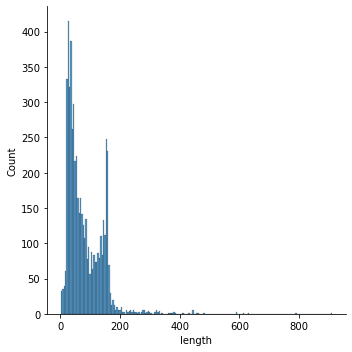

In [10]:
sns.displot(sms["length"], bins=200)

In [11]:
sms["length"].describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

The maximun length of a message is 910.

In [12]:
sms[sms["length"]==910]

,ham/spam,sms,length
1085,ham,For me the love should start with attraction.i...,910


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

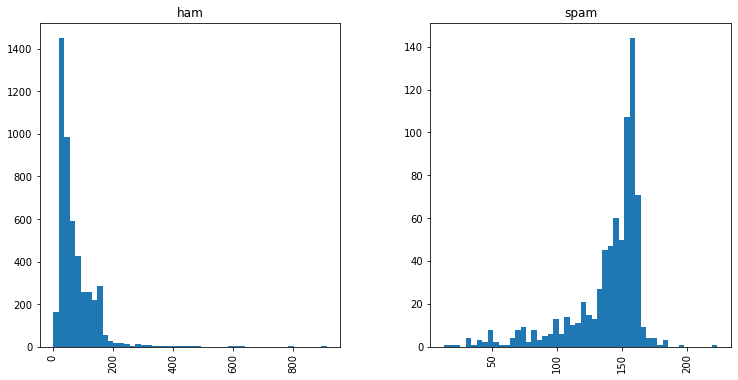

In [13]:
sms.hist("length","ham/spam",bins=50, figsize=(12,6))

In [14]:
round(sms[sms["ham/spam"]=="ham"]["length"].mean(), 2)

71.47

The average length of ham messages is around 71

In [15]:
round(sms[sms["ham/spam"]=="spam"]["length"].mean(), 2)

138.68

The average length of spam messages is around 138

## Text Normalization
### 1. Tokenization
### 2. Stopwords exclusion
### 3. Stemming

In [16]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


def text_normalize(text):
    """
    
    remove punctuations in text
    remove stopwords
    converts each word in data into its base form (lemma)
    return list of text words
    
    """
    text = text.lower()
    
    nopunc = [char for char in text if char not in string.punctuation] # remove punctuation
    nopunc = "".join(nopunc)
    
    nostop = [word for word in nopunc.split() if word not in stopwords.words("english")] # tokenization and stopwords removal 
    
    ps = PorterStemmer()
    stem_text = [ps.stem(word) for word in nostop]
    
    return [word for word in stem_text] 


In [17]:
# original dataframe
sms.head()

,ham/spam,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# applying normalization on first 5 messages
sms["sms"].head(5).apply(text_normalize)

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: sms, dtype: object

### Corpus

In [19]:
corpus = sms["sms"].apply("".join)
corpus

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: sms, Length: 5574, dtype: object

### Bag of words - Count Vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer(analyzer = text_normalize)

In [22]:
bow_words = cv.fit(sms["sms"])

In [23]:
# number of tokens of words
print("The number of words considered in bag of words vector is", len(bow_words.vocabulary_))

The number of words considered in bag of words vector is 8194


In [24]:
bow = bow_words.transform(sms["sms"])

In [25]:
bow.shape

(5574, 8194)

A sample row (counts vector) of sparse matrix. Only non-zero counts are shown

In [26]:
print(bow[0])

  (0, 1122)	1
  (0, 1311)	1
  (0, 1717)	1
  (0, 1719)	1
  (0, 2002)	1
  (0, 2222)	1
  (0, 2665)	1
  (0, 3310)	1
  (0, 3363)	1
  (0, 3401)	1
  (0, 4108)	1
  (0, 4254)	1
  (0, 4933)	1
  (0, 5601)	1
  (0, 7675)	1
  (0, 7881)	1


In [27]:
bow_words.get_feature_names()[7881]

'world'

The word at the index 7881 in "Bag of Words" vector is "world".

#### Splitting the data into feature and label

In [28]:
x = bow.toarray()
x.shape

(5574, 8194)

In [29]:
y = sms["ham/spam"].values
y.shape

(5574,)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lenc = LabelEncoder()
y = lenc.fit_transform(y)

In [32]:
y.reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

### TfidfTransformer

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
tfidf = TfidfTransformer()
x_model = tfidf.fit_transform(x)

In [35]:
# tf * idf weights
print(x_model[0])

  (0, 7881)	0.22907203231499607
  (0, 7675)	0.1872592785497696
  (0, 5601)	0.23016584925409087
  (0, 4933)	0.18195455329516075
  (0, 4254)	0.28476395118851094
  (0, 4108)	0.3370744410861104
  (0, 3401)	0.187616949873972
  (0, 3363)	0.1581933907536758
  (0, 3310)	0.13539641005992295
  (0, 2665)	0.19981361149844792
  (0, 2222)	0.26104400551860724
  (0, 2002)	0.28476395118851094
  (0, 1719)	0.28476395118851094
  (0, 1717)	0.3217746035938861
  (0, 1311)	0.2563210942028906
  (0, 1122)	0.3370744410861104


Inverse Document Frequency of "world"

In [36]:
tfidf.idf_[bow_words.vocabulary_["world"]]

6.070699534838906

### Train the model

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
clf = MultinomialNB()

In [39]:
clf.fit(x_model,y)

MultinomialNB()

In [40]:
print("Predicted :", clf.predict(x_model[0]))
print("Expected  :", y[0])
# label = 0 -> "ham"
# label = 1 -> "spam"

Predicted : [0]
Expected  : 0


In [41]:
print("Predicted :", clf.predict(x_model[2]))
print("Expected  :", y[2])

Predicted : [1]
Expected  : 1


In [42]:
x = sms["sms"].values

In [43]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [44]:
x.shape

(5574,)

### Train_Test_Split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [46]:
x_train[0:10]

array(['Dunno lei... I might b eatin wif my frens... If ü wan to eat then i wait 4 ü lar',
       'What you doing?how are you?',
       "No I'm good for the movie, is it ok if I leave in an hourish?",
       'No da. . Vijay going to talk in jaya tv',
       'We walked from my moms. Right on stagwood pass right on winterstone left on victors hill. Address is &lt;#&gt;',
       'I just got home babe, are you still awake ?',
       "Ok... But they said i've got wisdom teeth hidden inside n mayb need 2 remove.",
       '"Its Ur luck to Love someone. Its Ur fortune to Love the one who Loves U. But, its a miracle to Love a person who can\'t Love anyone except U..." Gud nyt...',
       "Oh fine, I'll be by tonight",
       "I can probably come by, everybody's done around  &lt;#&gt;  right?"],
      dtype=object)

### Create Pipeline

In [47]:
from sklearn.pipeline import Pipeline

### Naive Bayes Classifier

In [48]:
pipeline  = Pipeline([
    ("bow", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB())
])

In [49]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [50]:
y_pred = pipeline.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
print("Accuracy :", round(accuracy_score(y_test, y_pred),2))

Accuracy : 0.96


In [53]:
print("Confusion Matrix \n")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix 

[[950   0]
 [ 48 117]]


In [54]:
print("Classification Report\n")
print(classification_report(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       950
           1       1.00      0.71      0.83       165

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
pipeline_rfc  = Pipeline([
    ("bow", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("clf", RandomForestClassifier())
])

In [57]:
pipeline_rfc.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [58]:
y_pred_rfc = pipeline_rfc.predict(x_test)

In [59]:
print("Accuracy :", round(accuracy_score(y_test, y_pred_rfc),2))

Accuracy : 0.97


In [60]:
print("Confusion Matrix \n")
print(confusion_matrix(y_test, y_pred_rfc))

Confusion Matrix 

[[950   0]
 [ 29 136]]


In [61]:
print("Classification Report\n")
print(classification_report(y_test, y_pred_rfc))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       950
           1       1.00      0.82      0.90       165

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Normalized text in a good way to minimize the Bag of words vector and improved the importance (tfidf score) of each word in corpus.
Developed good models for SPAM Classification using Natural Language Processing with accuracy around 97.0